In [1]:
# This exersise display segmentation of an image via KMean Clustering
# Segmentation is important technique to identify different element in an image e.g. Objects, background, foreground etc.
# This coding practice contains usage of Matplotlib, and sklearn for segemtation and also Matplotlibe and CV2 for segmentation
import numpy as np
# Image Segmentation is the process of partitioning an
# image into multiple regions based on the characteristics of the pixels in the original image.
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Shape of image:  (1024, 768, 3)
Shape of flat image color np array:  (786432, 3)


  ax = Axes3D(fig)


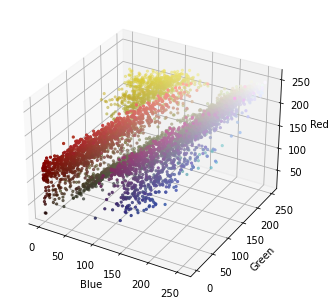

In [2]:
# The first step is to read the image without worrying of its type and format. We will use OpenCV library to read image
# as Numpy array
image = cv2.imread("IronMan.jpeg")
print("Shape of image: ", image.shape)

# As you can see image is 3 D shape, we need to flatten it in 2 Dimension.
# We are interested in colors of each pixle which is a vector of 3 element.
flat = np.reshape(image, (-1,3))
print("Shape of flat image color np array: ", flat.shape)

# You can observe from shape that there are ~.8 million pixles hence drawing scatter plot will take time and you
# will see overlapped colors. Hence I will take random sample out of flat array of 5K pixles
# With below statement you get 5K random index in flat array, shape[0] gives total number of pixel in flat array
indexes = np.random.choice(flat.shape[0], 5000)
# Fetch 5K pixel out of randomly choosed indexes
sample_flat = flat[indexes]

# As matplot library takes normalied color value and colors needs to be in RGB color sequence.
# CV2 library read colors in BGR format hence we will shuffle the color and normalize the value
color = sample_flat[:, [2,1,0]]/255.0

# Now we have all sampled 5K pixel colors in RGB and normalized

# Now draw the scatter plot for all pixle color space
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(sample_flat[:,0], sample_flat[:,1], sample_flat[:,2], c=color, marker = ".")
ax.set_xlabel("Blue")
ax.set_ylabel("Green")
ax.set_zlabel("Red")
plt.show()
plt.clf()
plt.close()

Shape of vectorized image:  (786432, 3)
Sum of Squared Distances  1096615060.1726058
Best Labels  [[1]
 [3]
 [1]
 ...
 [4]
 [4]
 [4]]
centers  [[205 203 204]
 [160 153 165]
 [208 196  80]
 [109  91 117]
 [106  49  33]
 [173  89  74]]
Centers as Unsigned 8 bit  [[205 203 204]
 [160 153 165]
 [208 196  80]
 [109  91 117]
 [106  49  33]
 [173  89  74]]
Centroid colors:  [[0.80392157 0.79607843 0.8       ]
 [0.62745098 0.6        0.64705882]
 [0.81568627 0.76862745 0.31372549]
 [0.42745098 0.35686275 0.45882353]
 [0.41568627 0.19215686 0.12941176]
 [0.67843137 0.34901961 0.29019608]]


C:\Users\samehrot\AppData\Local\Temp\ipykernel_56664\2055191080.py:38: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


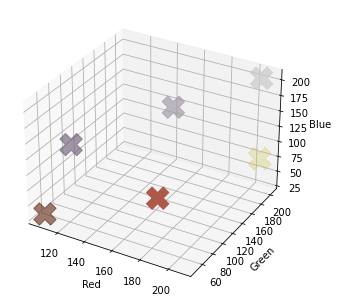

(1024, 768, 3)


In [3]:
# As opencv is having BGR (Blue Green Red) precidence hence we convert it to RGB
# The difference I observe is by default I see Blue is given preference hence image looks more blueish by default
# Open CV provde easy method to change color precidence

img=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# Like we did before for sampled data, reshaped the image to 2 dimension we need to do it again for complete image
# As K Mean require 2 Dimensional vector hence reshaping it to 2 D, with 3 features each row. (N-Rows, M-Features)
# Here vectorized represent pixel's color vector
vectorized = img.reshape((-1,3))
# CV2 needs float32 type
vectorized = np.float32(vectorized)

print("Shape of vectorized image: ", vectorized.shape)


### KMean via CV2 library, Picture drawing is also via CV2 ######
K = 6
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)
sum_squared_distances, bestLabels, centers = cv2.kmeans(data = vectorized,
                                                        K = K,
                                                        bestLabels = None,
                                                        criteria = criteria,
                                                        attempts = 10,
                                                        flags = cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
print("Sum of Squared Distances ", sum_squared_distances)
print("Best Labels ", bestLabels)
print("centers ", centers)

# Now lets draw the scatter plot of how Kmean categoried the color centers
# Color needs to be unsigned 8 bit ints
centers = np.uint8(centers)
print("Centers as Unsigned 8 bit ", centers)
# Normalize it between 0-1
color = centers/255.0
print("Centroid colors: ", color)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(centers[:,0], centers[:,1], centers[:,2], c=color, marker = "X", s = 500)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")
plt.show()
plt.clf()
plt.close()


# Now draw the image with segmented color
# Convert bestLabels with segmented color as per their category
# Reshape the bestLabels to the shape of image

# As centers are in RBG color sequence but CV2 takes BGR
centers = centers[:,[2,1,0]]
segmented_pix = centers[bestLabels]
segmented_pix = segmented_pix.reshape(img.shape)
print(segmented_pix.shape)
cv2.imshow("frame",segmented_pix)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
Ks = []
distances = []
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 250, 1.0)

for K in range(2,16):
    sum_squared_distances, bestLabels, centers = cv2.kmeans(data = vectorized,
                                                        K = K,
                                                        bestLabels = None,
                                                        criteria = criteria,
                                                        attempts = 10,
                                                        flags = cv2.KMEANS_RANDOM_CENTERS)    
    Ks.append(K)
    distances.append(sum_squared_distances)
plt.plot(Ks, distances)
plt.show()

Centroids
 [[107  89 115]
 [204 202 204]
 [208 196  80]
 [174  91  75]
 [107  48  33]
 [158 151 164]]
Labels shape
 (786432,)
Labels flattened
 [5 0 5 ... 4 4 4]
Shape of segmented data  (786432, 3)
Shape of image  (1024, 768, 3)


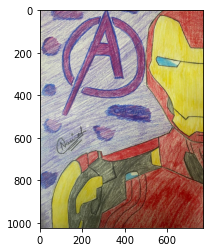

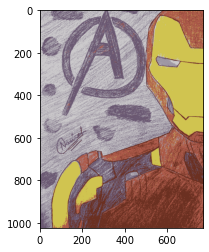

In [4]:
### KMean via sklearn ###
## Draw picture via Plot lib ##
from sklearn.cluster import KMeans

# We have already identified pixel in CV2 KMean, we will use same as its already in RGB
kmean_model = KMeans(n_clusters=6, random_state = 0, n_init=5)
kmean_model.fit(vectorized)

# Same as in CV2
centers = kmean_model.cluster_centers_
centers = np.uint8(centers)

# Draw picture in the segmented colors (Centroid identified by K Mean)
print("Centroids\n", centers)

# You will notice the center will be same as of K value passed
bestLabels = kmean_model.labels_
print("Labels shape\n", bestLabels.shape)
# I see no requirement of flattening as labels are already one D
print("Labels flattened\n",bestLabels.flatten())
# Segment data tells colored label for each data point which is color of centroid 
segment_data = centers[bestLabels.flatten()]
print("Shape of segmented data ", segment_data.shape)
print("Shape of image ", img.shape)
segment_image = segment_data.reshape((img.shape))
plt.imshow(img)
plt.pause(1)
plt.imshow(segment_image)
plt.pause(1)
